In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import math
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Cleaned loan.csv')

In [3]:
df.head()

,customer.id,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,inq.last.6mths,delinq.2yrs,paid.back.loan
0,LA001,Yes,debt_consolidation,11.89%,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,Less than 5,No,Yes
1,LA002,Yes,credit_card,10.71%,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,Less than 5,No,Yes
2,LA003,Yes,debt_consolidation,13.57%,366.86,10.373491,11.63,682,4710.000000,3511,25.6,0,Less than 5,No,Yes
3,LA004,Yes,debt_consolidation,10.08%,162.34,11.350407,8.10,712,2699.958333,33667,73.2,0,Less than 5,No,Yes
4,LA005,Yes,credit_card,14.26%,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,Less than 5,Yes,Yes


In [4]:
sample_size = 2000

df_sample = df.sample(n=sample_size, random_state=0)
df_sample.head()

,customer.id,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,inq.last.6mths,delinq.2yrs,paid.back.loan
3343,LA003344,Yes,all_other,11.89%,49.75,10.829729,16.87,687,2314.958333,962,64.1,0,Less than 5,No,Yes
9,LA0010,Yes,debt_consolidation,12.21%,84.12,10.203592,10.00,707,2730.041667,5630,23.0,0,Less than 5,No,Yes
1741,LA001742,Yes,debt_consolidation,16.95%,712.54,11.918391,13.61,672,4830.041667,16473,94.1,0,Less than 5,Yes,Yes
5160,LA005161,Yes,debt_consolidation,17.39%,286.78,11.189962,19.59,667,7020.000000,19892,67.0,1,Less than 5,No,Yes
7760,LA007761,No,credit_card,13.12%,202.51,9.392662,4.40,657,898.958333,5251,49.3,0,Less than 10,No,Yes


In [5]:
sample_mean = df_sample.installment.mean()
print(sample_mean)

317.61096499999996


In [6]:
sample_std = df_sample.installment.std()
print(sample_std)

207.64991593475952


In [7]:
z_critical = stats.norm.ppf(q=0.95)
print(z_critical)

1.6448536269514722


In [8]:
margin_error = z_critical*(sample_std/math.sqrt(sample_size))
print(margin_error)

7.637373299879691


In [9]:
confidence_interval = (sample_mean-margin_error,sample_mean+margin_error)
print(confidence_interval)

(309.97359170012027, 325.24833829987966)


In [10]:
true_mean = df.installment.mean()
print(true_mean)

319.08941323867265


In [11]:
#CENTRAL LIMIT THEOREM
sample_size=np.array([20,50,100])

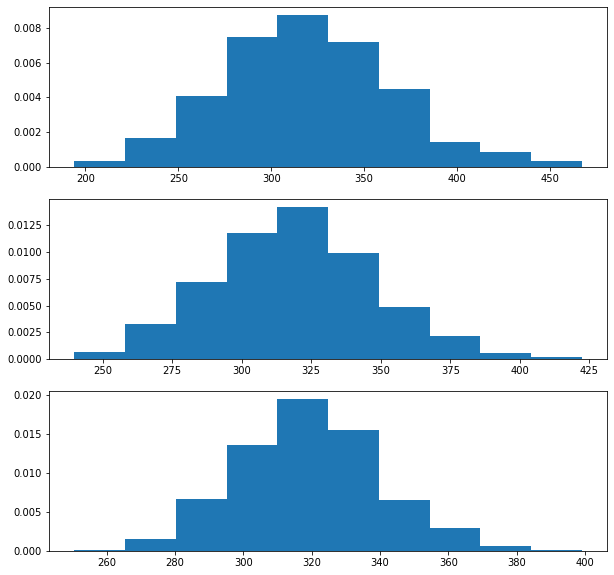

In [12]:
fig ,axes = plt.subplots(3,1, figsize=(10,10))

for i in range(len(sample_size)):
    m=[]
    
    for j in range(1000):
        mean = df['installment'].sample(sample_size[i]).mean()
        m.append(mean)
    
    mean_series = pd.Series(m)
    
    axes[i].hist(mean_series, normed=True)

In [13]:
from statsmodels.stats.weightstats import ztest

In [14]:
#HYPOTHESIS TESTING

# Removing the last character from the values in column
df['int.rate'] = df['int.rate'].map(lambda x: str(x)[:-1])

#Dividing the column values by 100
df['int.rate']= df['int.rate'].astype(float)/100

In [15]:
z_statistics,p_value = ztest(df[df['purpose']=='small_business']['int.rate'], value = df['int.rate'].mean(), alternative='larger')

In [16]:
print("Z score",z_statistics)
print("p value",p_value)

Z score 12.321276240201554
p value 3.479213190639132e-35


In [17]:
if p_value<0.05:
    inference = 'Reject Null H'
else:
    inference = 'Accept Null H'
    
print(inference)

Reject Null H


In [18]:
z_statistic1, p_value1 = ztest(x1=df[df['paid.back.loan']=='No']['installment'], x2=df[df['paid.back.loan']=='Yes']['installment'])

print(('Z-statistic1 is :{}'.format(z_statistic1)))
print(('P-value1 is :{}'.format(p_value1)))

Z-statistic1 is :4.894575287952092
P-value1 is :9.85182562491764e-07


In [19]:
if p_value1<0.05:
    inference1 = 'Reject Null H'
else:
    inference1 = 'Accept Null H'
    
print(inference1)

Reject Null H


In [20]:
yes = df[df['paid.back.loan'] == 'Yes']['purpose'].value_counts()
yes
no = df[df['paid.back.loan'] == 'No']['purpose'].value_counts()
no

debt_consolidation    603
all_other             387
small_business        172
credit_card           146
home_improvement      107
educational            69
major_purchase         49
Name: purpose, dtype: int64

In [21]:
observed = pd.concat([yes.transpose(),no.transpose()],keys= ['Yes','No'],axis=1)
print(observed)

                     Yes   No
all_other           1944  387
credit_card         1116  146
debt_consolidation  3354  603
educational          274   69
home_improvement     522  107
major_purchase       388   49
small_business       447  172


In [22]:
chi2, p, dof, ex = stats.chi2_contingency(observed)

In [23]:
print(chi2)

96.98469589063261


In [24]:
critical_value = stats.chi2.ppf(q = 0.95, df = 6)
print(critical_value)

12.591587243743977
